In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib import rcParams


In [20]:
df=pd.read_csv(r'C:/Users/91836/Desktop/Curriculum and courses/Semesters/sem 7/Data Analytics Laboratory/A3/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [50]:
df.shape

(32561, 15)

In [51]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [81]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [103]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [97]:
df['USA']=df['native.country']=='United-States'
df['USA'] = df['USA'].astype(int)
df=df.drop(['native.country'], axis=1)

In [98]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,USA
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,<=50K,1
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,<=50K,1
2,66,?,10,Widowed,?,Unmarried,Black,Female,0,4356,40,<=50K,1
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,<=50K,1
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,<=50K,1


In [80]:
df=df.drop(['education','fnlwgt'], axis=1)

In [31]:
sns.set()

<AxesSubplot:xlabel='income', ylabel='age'>

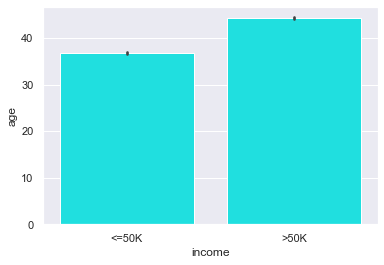

In [42]:
sns.barplot(data=df,x='income',y='hours.per.week',color='cyan')

<AxesSubplot:xlabel='income', ylabel='education.num'>

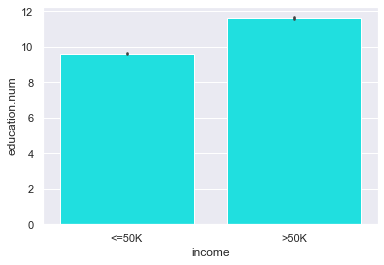

In [41]:
sns.barplot(data=df,x='income',y='education.num',color='cyan')

<AxesSubplot:xlabel='income', ylabel='age'>

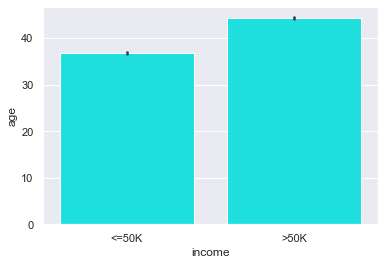

In [43]:
sns.barplot(data=df,x='income',y='age',color='cyan')

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

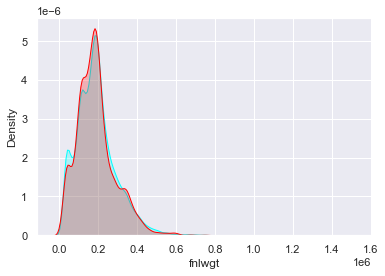

In [48]:
sns.kdeplot(df["fnlwgt"][df.income == '<=50K'], color="cyan", shade=True)
sns.kdeplot(df["fnlwgt"][df.income == '>50K'], color="red", shade=True)

In [102]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [196]:
colors = ["white","red", "green", "blue", "orange", "yellow", "purple"] 
df.workclass.value_counts().plot.bar(color=colors,legend=True)

AttributeError: 'DataFrame' object has no attribute 'workclass'

In [107]:
df[df=='?']=np.nan

In [164]:
df.isna().sum()

age               0
workclass         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
income            0
USA               0
dtype: int64

In [113]:
df['workclass'].mode()
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

In [159]:
null_values=df[df['occupation'].isnull()]['income'].value_counts()[0]/df[df['occupation'].isnull()]['income'].count()

In [155]:
occupations=df['occupation'].unique()

In [160]:
for occupation in occupations[1:]:
    frac=df[df['occupation']==occupation]['income'].value_counts()[0]/df[df['occupation']==occupation]['income'].count()
    print("Occupation:",occupation)
    print("fraction of <=50K income:",frac )
    print("absolute difference", abs(null_values-frac) )

Occupation: Exec-managerial
fraction of <=50K income: 0.5159862272503689
absolute difference 0.38037839564708087
Occupation: Machine-op-inspct
fraction of <=50K income: 0.8751248751248751
absolute difference 0.021239747772574646
Occupation: Prof-specialty
fraction of <=50K income: 0.5509661835748793
absolute difference 0.3453984393225705
Occupation: Other-service
fraction of <=50K income: 0.958421851289833
absolute difference 0.06205722839238326
Occupation: Adm-clerical
fraction of <=50K income: 0.8655172413793103
absolute difference 0.030847381518139483
Occupation: Craft-repair
fraction of <=50K income: 0.7733593559404733
absolute difference 0.12300526695697644
Occupation: Transport-moving
fraction of <=50K income: 0.799624295554164
absolute difference 0.09674032734328575
Occupation: Handlers-cleaners
fraction of <=50K income: 0.9372262773722628
absolute difference 0.04086165447481305
Occupation: Sales
fraction of <=50K income: 0.7306849315068493
absolute difference 0.1656796913906004

In [163]:
df['occupation'].value_counts()

Adm-clerical         5613
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [162]:
df['occupation'].fillna('Adm-clerical',inplace=True)

In [169]:
encode ={"sex":{"Male": 0, "Female": 1}}
df=df.replace(encode)
df.head()
df['sex'].value_counts()

0    21790
1    10771
Name: sex, dtype: int64

In [172]:
encode ={"income":{"<=50K": 0, ">50K": 1}}
df=df.replace(encode)
df.head()
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [173]:
catogrical_column = [column for column in df.columns if df[column].dtypes=='object']
print(catogrical_column)

['workclass', 'marital.status', 'occupation', 'relationship', 'race']


In [174]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,USA
0,90,Private,9,Widowed,Adm-clerical,Not-in-family,White,1,0,4356,40,0,1
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,0,1
2,66,Private,10,Widowed,Adm-clerical,Unmarried,Black,1,0,4356,40,0,1
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,0,1
4,41,Private,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,0,1


In [175]:
from sklearn import preprocessing

for feature in catogrical_column:
        le = preprocessing.LabelEncoder()
        df[feature] = le.fit_transform(df[feature])

C:\Users\91836\AppData\Local\Temp\ipykernel_17452\2283301565.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


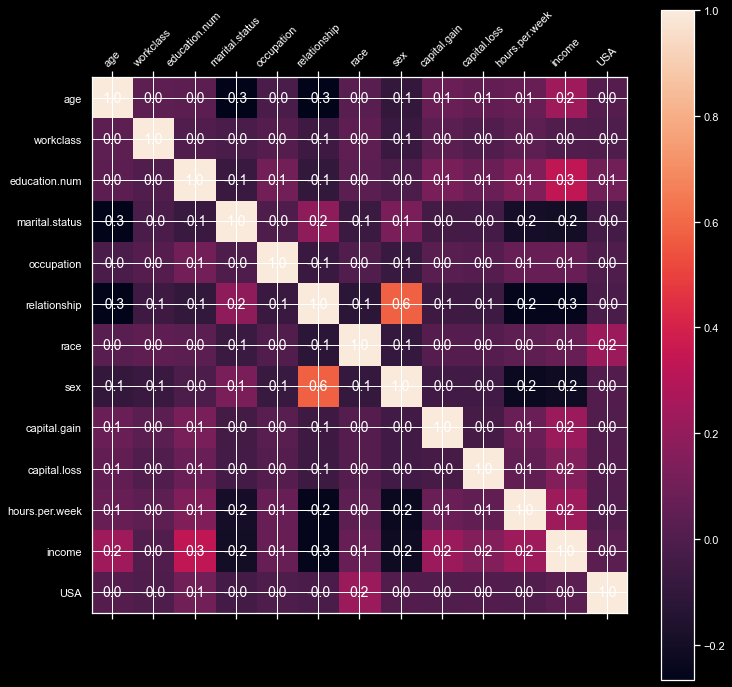

In [177]:
rcParams['figure.figsize'] = 12, 12
plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [181]:
df.head()

,age,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,90,9,6,0,1,4,1,0,4356,40,0
1,82,9,6,3,1,4,1,0,4356,18,0
2,66,10,6,0,4,2,1,0,4356,40,0
3,54,4,0,6,4,4,1,0,3900,40,0
4,41,10,5,9,3,4,1,0,3900,40,0


In [182]:
X = df.drop(['income'], axis=1)
y = df['income']

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0., random_state = 0)

In [185]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [189]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [190]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - GaussianNB'])
df_out = pd.concat([y_test.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6193
           1       0.69      0.31      0.43      1948

    accuracy                           0.80      8141
   macro avg       0.75      0.63      0.66      8141
weighted avg       0.79      0.80      0.77      8141

[[5916  277]
 [1336  612]]
80.18670924947796


In [191]:
#Applying the BernoulliNB algorithm
bernouli = BernoulliNB()
bernouli.fit(X_train, y_train)
y_pred = bernouli.predict(X_test)
acc_bernouli = round(bernouli.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - BernouliNB'])
df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      6193
           1       0.46      0.71      0.56      1948

    accuracy                           0.73      8141
   macro avg       0.67      0.72      0.68      8141
weighted avg       0.79      0.73      0.75      8141

[[4565 1628]
 [ 567 1381]]
73.03771035499325


In [192]:
#Applying the MultinomialNB algorithm
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)
y_pred = multinomial.predict(X_test)
acc_multinomial = round(multinomial.score(X_train, y_train) * 100, 2)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred)*100)
df_pred = pd.DataFrame(y_pred, columns=['Income Predicted - MultinomialNB'])
df_out = pd.concat([df_out.reset_index(drop='Tru‌​e'), df_pred.reset_index(drop='Tru‌​e')],axis=1)

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      6193
           1       0.96      0.03      0.06      1948

    accuracy                           0.77      8141
   macro avg       0.86      0.52      0.47      8141
weighted avg       0.81      0.77      0.68      8141

[[6190    3]
 [1884   64]]
76.82102935757278


In [193]:
results = pd.DataFrame({
    'Model': ['BernouliNB', 'GaussianNB', 'MultinomialNB'],
    'Score': [acc_gaussian, acc_bernouli, acc_multinomial]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(3)

,Model
Score,
80.05,BernouliNB
76.69,MultinomialNB
73.01,GaussianNB
